[View in Colaboratory](https://colab.research.google.com/github/manan-arya/Fake_News_US/blob/master/Classifier.ipynb)

In [42]:
!wget https://raw.githubusercontent.com/manan-arya/Fake_News_US/master/kaggle_dataset/train.csv?token=AcjiTfZQHIFYhQ_qKtVo0y6rG3mD71Lcks5bl-ZPwA%3D%3D
!wget https://raw.githubusercontent.com/manan-arya/Fake_News_US/master/kaggle_dataset/test.csv?token=AcjiTZknxG_W1-9YmnE6V9HSgBkxaIJgks5bl-aEwA%3D%3D


Redirecting output to ‘wget-log.4’.

Redirecting output to ‘wget-log.5’.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
train = pd.read_csv('train.csv?token=AcjiTfZQHIFYhQ_qKtVo0y6rG3mD71Lcks5bl-ZPwA%3D%3D')
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [45]:
test = pd.read_csv('test.csv?token=AcjiTZknxG_W1-9YmnE6V9HSgBkxaIJgks5bl-aEwA%3D%3D')
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


###Unreliable = 1
###Reliable = 0

##Plots

In [0]:
train_no_id = train.drop('id', axis = 1)

In [47]:
for_graph_fake = train_no_id.groupby(by = 'author', axis = 0, as_index = False).sum()
for_graph_fake.columns

Index(['author', 'label'], dtype='object')

** for_graph_fake Gives a relationship between authors and the number of 'unreliable' (fake) news from them.**

In [48]:
for_graph_fake.head()

,author,label
0,# 1 NWO Hatr,17
1,-NO AUTHOR-,54
2,10 Habits That Will Make Your Life Easier &amp...,1
3,10 More Beautiful Images That Remind You We St...,1
4,10 Movies That Could Change Your Understanding...,1


**Just one value in the graph, is above 100, this could have been a discrepancy**

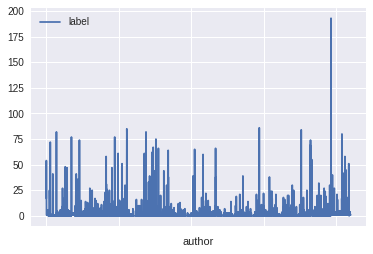

In [49]:
for_graph_fake.plot(x = 'author', y = 'label', kind = 'line')

In [50]:
len(for_graph_fake)

4201

**nlargest is used to get n largest values in a df**

In [51]:
for_graph_fake['label'].nlargest(n = 2, keep = 'first')

3929    193
2939     86
Name: label, dtype: int64

In [52]:
for_graph_fake.head()

,author,label
0,# 1 NWO Hatr,17
1,-NO AUTHOR-,54
2,10 Habits That Will Make Your Life Easier &amp...,1
3,10 More Beautiful Images That Remind You We St...,1
4,10 Movies That Could Change Your Understanding...,1


**'Shoot First Ask Later' is the author with maximum number of 'unreliable' news**

In [53]:
for_graph_fake.max()

author    “Shoot First Ask Questions Later” : What Happe...
label                                                   193
dtype: object

**To make sure that value is unreliable we must use mean as a criteria instead of sum**

In [54]:
for_graph_total = train.groupby('author', axis = 0, as_index = False).count().loc[:,['author','label']]
for_graph_total.head()

,author,label
0,# 1 NWO Hatr,17
1,-NO AUTHOR-,54
2,10 Habits That Will Make Your Life Easier &amp...,1
3,10 More Beautiful Images That Remind You We St...,1
4,10 Movies That Could Change Your Understanding...,1


In [0]:
#for_graph_mean = train_no_id.groupby(by = 'author', axis = 0, as_index = False)['label'].sum()/train.groupby('author', axis = 0, as_index = False).count()['label']

In [0]:
#for_graph_mean

In [57]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [0]:
import seaborn as sns

In [0]:
plot_data=train.groupby(["author","label"]).sum()

In [0]:
# tried to unstack fake/real author but fake value is too low

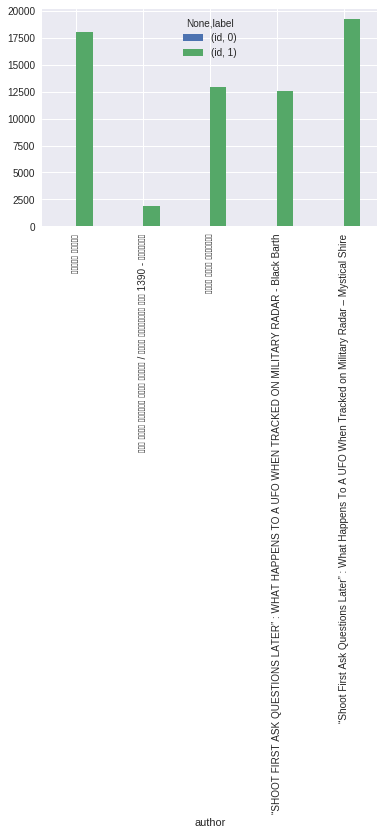

In [61]:
plot_data.unstack().tail().plot(kind='bar')

In [0]:
# we can find the caategories of news using unsuperwised learning , in which we can plot graph of category with max no. of fake news !!!

In [0]:
#You have to specify how many categories you have to divide into. It won't work like that

In [64]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [65]:
train.groupby('author')['label'].sum()

author
# 1 NWO Hatr                                                                                                                          17
-NO AUTHOR-                                                                                                                           54
10 Habits That Will Make Your Life Easier &amp; More Peaceful - Wellness Solutions                                                     1
10 More Beautiful Images That Remind You We Still Live In A Beautiful World, With Beautiful People - Upside Down Media                 1
10 Movies That Could Change Your Understanding Of Life - Upside Down Media                                                             1
10 Nutritious Foods That Help Reduce Asthma Attacks &amp; Boost Your Health - Health Alternative Solutions                             1
10 Presidents &amp; Politicians Who Told Us That A “Secret Government” Controls The World &amp; What They Said - Upside Down Media     1
10 Shocking Facts About Society Th

In [66]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


##Classifiers

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


#!pip install scikit-learn==0.18.0

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [0]:
train_no_id.dropna(axis = 0, inplace = True)

In [0]:
X = train_no_id['text']
y = train_no_id['label']

In [72]:
len(X)

18285

In [0]:
#X.dropna(axis = 0,inplace = True)

In [74]:
len(X)

18285

In [75]:
vectorizer = CountVectorizer()
vectorizer.fit(X)
transformed = vectorizer.transform(X)
transformed

<18285x160355 sparse matrix of type '<class 'numpy.int64'>'
	with 6338616 stored elements in Compressed Sparse Row format>

In [76]:
vectorizer.vocabulary_

{'house': 62275,
 'dem': 35298,
 'aide': 6317,
 'we': 141885,
 'didn': 37151,
 'even': 45742,
 'see': 116933,
 'comey': 28174,
 'letter': 76500,
 'until': 137324,
 'jason': 68684,
 'chaffetz': 24607,
 'tweeted': 134802,
 'it': 67914,
 'by': 21699,
 'darrell': 33772,
 'lucus': 78772,
 'on': 94003,
 'october': 93188,
 '30': 1826,
 '2016': 1326,
 'subscribe': 126067,
 'the': 130506,
 'stump': 125741,
 'in': 64679,
 'american': 8066,
 'fork': 50493,
 'utah': 137908,
 'image': 64068,
 'courtesy': 31221,
 'michael': 84160,
 'jolley': 69713,
 'available': 12716,
 'under': 135942,
 'creative': 31632,
 'commons': 28374,
 'license': 76864,
 'with': 143647,
 'apologies': 9765,
 'to': 131896,
 'keith': 71611,
 'olbermann': 93724,
 'there': 130733,
 'is': 67627,
 'no': 91177,
 'doubt': 39573,
 'who': 142894,
 'worst': 144233,
 'person': 98927,
 'world': 144167,
 'this': 130959,
 'week': 142047,
 'fbi': 47964,
 'director': 37661,
 'james': 68479,
 'but': 21562,
 'according': 4604,
 'democratic': 354

In [77]:
print(transformed)

  (0, 1314)	1
  (0, 1326)	2
  (0, 1590)	1
  (0, 1687)	1
  (0, 1826)	2
  (0, 3136)	1
  (0, 4111)	1
  (0, 4202)	7
  (0, 4399)	1
  (0, 4604)	3
  (0, 4955)	1
  (0, 5031)	1
  (0, 5559)	1
  (0, 5918)	5
  (0, 5995)	1
  (0, 6317)	5
  (0, 7264)	2
  (0, 7606)	3
  (0, 7626)	2
  (0, 8066)	1
  (0, 8384)	5
  (0, 8535)	1
  (0, 8555)	16
  (0, 9039)	1
  (0, 9175)	1
  :	:
  (18284, 143773)	1
  (18284, 143956)	1
  (18284, 144052)	1
  (18284, 144112)	1
  (18284, 144122)	1
  (18284, 144134)	1
  (18284, 144167)	5
  (18284, 144169)	2
  (18284, 144210)	1
  (18284, 144264)	1
  (18284, 144267)	1
  (18284, 144307)	1
  (18284, 144473)	1
  (18284, 144496)	1
  (18284, 144521)	1
  (18284, 144534)	1
  (18284, 144549)	1
  (18284, 144581)	1
  (18284, 144582)	1
  (18284, 144587)	1
  (18284, 144645)	1
  (18284, 145254)	1
  (18284, 145264)	3
  (18284, 145628)	2
  (18284, 145660)	2


In [78]:
transformed.shape

(18285, 160355)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(transformed,y, test_size = 0.2, random_state = 15)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
steps = [('knn',KNeighborsClassifier())]

pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
preds_lr = pipeline.predict(X_test)
pipeline.score(X_test, y_test)


0.8400328137817884

In [0]:
# Tf-idf implementation

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

tfidf=TfidfVectorizer()
transformed=tfidf.fit_transform(X)
transformed

<18285x160355 sparse matrix of type '<class 'numpy.float64'>'
	with 6338616 stored elements in Compressed Sparse Row format>

In [87]:
clf_tfidf=SVC(kernel="linear")
clf_tfidf.fit(X_train,y_train)
preds_tfidf=clf_tfidf.predict(X_test)

(preds_tfidf==y_test).sum()/len(y_test)

0.9524200164068909